In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

# Q1: Multi-Layer Perceptron for Classification Dataset:   
You will use the UCI Optical Recognition of Handwritten Digits Dataset:

#### 1. Implement the following function that creates a weight matrix and initializes it with small random real numbers. [4 pts]* 

In [2]:
def initializeTheta(n1, n2):
    theta1 = []
    theta2 = []
    theta  = []
    
    for i in range(n1):
        theta1.append(np.random.uniform(-1, 1))

    for i in range(n2):
        theta2.append(np.random.uniform(-1, 1))
    
    theta.append(theta1)
    theta.append(theta2)

    return theta

In [3]:
r = initializeTheta(5, 8)

In [4]:
r

[[-0.3284531472033909,
  -0.003042425115212355,
  -0.1503540131103358,
  -0.9256879152552444,
  -0.3296369539341366],
 [-0.24588701491434728,
  0.41207122642307503,
  0.23762281267700636,
  0.10532742172480725,
  0.9204135846195691,
  -0.8315324257000491,
  -0.1614956365163449,
  0.16417388919804887]]

#### 2. Implement the logistic sigmoid activation function. [2 pts]

In [5]:
def logistic(z):
    ret = []
    for ele in z:
        ret.append(1 / (1 + math.exp(-ele)))
    
    return ret

In [6]:
logistic(r[1])

[0.4388361024521704,
 0.6015844159495622,
 0.559127745927232,
 0.526307538901481,
 0.7151263689225604,
 0.30332114435255625,
 0.45971361140782757,
 0.5409515328122172]

#### 3. Implement the ReLU (rectified linear unit) activation function. [3 pts]

In [7]:
def relu(z):
    ret = []
    
    for ele in z:
        if ele>0:
            ret.append(ele)
        else:
            ret.append(0)
    return ret

In [8]:
relu(r[1])

[0,
 0.41207122642307503,
 0.23762281267700636,
 0.10532742172480725,
 0.9204135846195691,
 0,
 0,
 0.16417388919804887]

#### 4. Implement the tanh (hyperbolic tangent) activation function. [3 pts]

In [9]:
def tanh(z):
    ret = []
    
    for ele in z:
        ret.append((math.exp(ele)-math.exp(-ele))/(math.exp(ele)+math.exp(-ele)))
    return ret

In [10]:
tanh(r[1])

[-0.2410485185965348,
 0.39022991932662243,
 0.23324914340214184,
 0.10493964631255583,
 0.7260930118090146,
 -0.6812979879891466,
 -0.1601061496603105,
 0.16271462330587555]

#### 5. Implement a MLPClassifier model class. It has a single hidden layer. It should have the following three methods. The model uses the backpropagation algorithm for learning the weights of the features/neurons. Note the that “fit” method should implement the Stochastic Gradient Descent algorithm for optimizing the weight update process. [40 pts]

In [11]:
# class MLPClassifier():
#     def __init__(self):
#         pass

    
    
#     def backpropagation():
        
        
        
#     # Stochastic Gradient Descent algorithm for optimizing the weight update process    
#     def fit(self, X, Y, hidden_layer_neurons=2, activation= ‘logistic’, regularizer=None, alpha=0.0001,
#             learning_rate=‘constant’, learning_rate_init=0.001, max_iter=1000, tol = 0.0001, verbose=False,
#             early_stopping=False, validation_fraction=0.1, n_iter_no_change=10,**kwargs):
        
    
#     def predict(self, X):
        
        
        
    

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', alpha=0.0001,
                    solver='sgd', max_iter = 30, tol=1e-4, random_state=1, learning_rate = 'constant',
                    learning_rate_init=0.001, early_stopping=True, validation_fraction=0.1, verbose=True, 
                    n_iter_no_change=5)

# Multi-Class Classification using MLPClassifier

#### 6. Read the handwritten digits dataset using the sklearn.datasets.load_digits function for performing multi-class classification.

In [14]:
data = datasets.load_digits()

In [15]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [16]:
print(data.keys())
print(data.feature_names)
print(data.target_names)
print(data.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]
(1797, 64)


In [17]:
data.target.shape

(1797,)

In [18]:
print(data.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [19]:
data.data.shape

(1797, 64)

In [20]:
data.images.shape

(1797, 8, 8)

<Figure size 432x288 with 0 Axes>

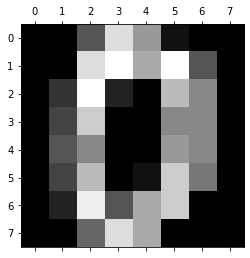

In [21]:
plt.gray() 
plt.matshow(data.images[0]) 
plt.show()

#### 7. Standardize the features. [1 pts]

In [22]:
scaler = preprocessing.StandardScaler()

In [23]:
print(data.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [24]:
scaler.fit(data.data)

StandardScaler()

In [25]:
print(scaler.mean_)
print(scaler.scale_)

[0.00000000e+00 3.03839733e-01 5.20478575e+00 1.18358375e+01
 1.18480801e+01 5.78185865e+00 1.36227045e+00 1.29660545e-01
 5.56483027e-03 1.99387869e+00 1.03823038e+01 1.19794101e+01
 1.02793545e+01 8.17584864e+00 1.84641068e+00 1.07957707e-01
 2.78241514e-03 2.60155815e+00 9.90317195e+00 6.99276572e+00
 7.09794101e+00 7.80634391e+00 1.78853645e+00 5.00834725e-02
 1.11296605e-03 2.46967168e+00 9.09126322e+00 8.82136895e+00
 9.92710072e+00 7.55147468e+00 2.31775181e+00 2.22593211e-03
 0.00000000e+00 2.33945465e+00 7.66722315e+00 9.07178631e+00
 1.03016138e+01 8.74401781e+00 2.90929327e+00 0.00000000e+00
 8.90372844e-03 1.58375070e+00 6.88146912e+00 7.22815804e+00
 7.67223150e+00 8.23650529e+00 3.45631608e+00 2.72676683e-02
 7.23427935e-03 7.04507513e-01 7.50695604e+00 9.53923205e+00
 9.41624930e+00 8.75848637e+00 3.72509738e+00 2.06455203e-01
 5.56483027e-04 2.79354480e-01 5.55759599e+00 1.20890373e+01
 1.18091263e+01 6.76405120e+00 2.06789093e+00 3.64496383e-01]
[1.         0.90693964 

In [26]:
X_scaled = scaler.transform(data.data)

In [27]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

#### 8. Partition the data into train and test set. [2 pts]

In [28]:
y = data.target
x = data.data

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
X_train

array([[ 0.,  0.,  3., ..., 13.,  4.,  0.],
       [ 0.,  0.,  9., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [31]:
y_train

array([6, 0, 0, ..., 2, 7, 1])

#### 9. You don’t need to report hyperparameter tuning. Note that unlike previous assignments, hyperparameter tuning is time-consuming for the MLP model. You may want to perform an educated tuning of the hyperparameters.

In [32]:
hidden_layeys = [32, 64]
activations = ['logistic','tanh','relu']
alphas = [0.001, 0.0001]
learning_rates = ['constant','invscaling']   # Only used when solver='sgd'
learning_rate_inits = [0.001, 0.0001]  # Only used when solver=’sgd’ or ‘adam’
n_iter_no_changes = [5,10]  # Only used when solver=’sgd’ or ‘adam’
max_iters = [30, 50]

In [33]:
# for size in hidden_layeys:
#     for act in activations:
#         for al in alphas:
#             for lr in learning_rates:
#                 for ini in learning_rate_inits:
#                     for chg in n_iter_no_changes:
#                         for mx in max_iters:
#                             mlp = MLPClassifier(hidden_layer_sizes=(size,), activation=act, alpha=al,
#                                                 solver='sgd', max_iter = mx, tol=1e-4, random_state=1, learning_rate = lr,
#                                                 learning_rate_init=ini, early_stopping=True, validation_fraction=0.1, verbose=True, 
#                                                 n_iter_no_change=chg)
#                             mlp.fit(X_train,y_train)
#                             pre = mlp.predict(X_test)
#                             print("===========================================================================================")
#                             print(metrics.accuracy_score(y_test, pre))
#                             print(size, act, al, lr, ini, chg, mx)
#                             print("===========================================================================================")

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', alpha=0.0001,
                    solver='sgd', max_iter = 30, tol=1e-4, random_state=1, learning_rate = 'constant',
                    learning_rate_init=0.001, early_stopping=True, validation_fraction=0.1, verbose=True, 
                    n_iter_no_change=5)

mlp.fit(X_train,y_train)
pre = mlp.predict(X_test)
print(metrics.accuracy_score(y_test, pre))

Iteration 1, loss = 6.80391232
Validation score: 0.250000
Iteration 2, loss = 2.75832930
Validation score: 0.618056
Iteration 3, loss = 1.14069352
Validation score: 0.666667
Iteration 4, loss = 0.67182667
Validation score: 0.763889
Iteration 5, loss = 0.47859807
Validation score: 0.791667
Iteration 6, loss = 0.37558894
Validation score: 0.833333
Iteration 7, loss = 0.31664819
Validation score: 0.847222
Iteration 8, loss = 0.27807588
Validation score: 0.868056
Iteration 9, loss = 0.24893099
Validation score: 0.868056
Iteration 10, loss = 0.23044115
Validation score: 0.868056
Iteration 11, loss = 0.21331928
Validation score: 0.875000
Iteration 12, loss = 0.20025975
Validation score: 0.875000
Iteration 13, loss = 0.19101364
Validation score: 0.875000
Iteration 14, loss = 0.17818283
Validation score: 0.881944
Iteration 15, loss = 0.16953275
Validation score: 0.881944
Iteration 16, loss = 0.16060559
Validation score: 0.881944
Iteration 17, loss = 0.15496484
Validation score: 0.881944
Iterat

In [35]:
print(mlp.score(X_test, y_test))

0.9472222222222222


In [36]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (64,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 30,
 'momentum': 0.9,
 'n_iter_no_change': 5,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

the optimal values of the hyperparameters:  
hidden_layer_neurons: 64  
activation: relu  
alpha: 0.0001   
learning_rate: constant  
learning_rate_init: 0.001  
max_iter: 5  
tol n_iter_no_change: 30  

#### 10. Your jupyter notebook should display the following items.

##### a) Epoch number, Training loss, validation loss, validation score, and step size (eta).

In [37]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (64,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 30,
 'momentum': 0.9,
 'n_iter_no_change': 5,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [38]:
mlp.loss_curve_

[6.803912316452706,
 2.758329302192552,
 1.1406935187179963,
 0.6718266676867347,
 0.47859806853808334,
 0.3755889362937117,
 0.316648186918025,
 0.27807587670992584,
 0.2489309894062503,
 0.23044114813160171,
 0.21331928171444386,
 0.20025975401456644,
 0.19101363514042174,
 0.17818282537399888,
 0.16953274732702298,
 0.16060558569107083,
 0.1549648388579894,
 0.14729910841323168,
 0.14317719785302332,
 0.13708692975635592,
 0.13138102332701282,
 0.12667361687153184,
 0.12255868831361139,
 0.11892497416006487,
 0.11481052485257455,
 0.11079851772406946]

In [39]:
mlp.validation_scores_

[0.25,
 0.6180555555555556,
 0.6666666666666666,
 0.7638888888888888,
 0.7916666666666666,
 0.8333333333333334,
 0.8472222222222222,
 0.8680555555555556,
 0.8680555555555556,
 0.8680555555555556,
 0.875,
 0.875,
 0.875,
 0.8819444444444444,
 0.8819444444444444,
 0.8819444444444444,
 0.8819444444444444,
 0.8888888888888888,
 0.8888888888888888,
 0.9097222222222222,
 0.8958333333333334,
 0.8958333333333334,
 0.8958333333333334,
 0.8958333333333334,
 0.9027777777777778,
 0.8958333333333334]

In [40]:
mlp.validation_scores_

[0.25,
 0.6180555555555556,
 0.6666666666666666,
 0.7638888888888888,
 0.7916666666666666,
 0.8333333333333334,
 0.8472222222222222,
 0.8680555555555556,
 0.8680555555555556,
 0.8680555555555556,
 0.875,
 0.875,
 0.875,
 0.8819444444444444,
 0.8819444444444444,
 0.8819444444444444,
 0.8819444444444444,
 0.8888888888888888,
 0.8888888888888888,
 0.9097222222222222,
 0.8958333333333334,
 0.8958333333333334,
 0.8958333333333334,
 0.8958333333333334,
 0.9027777777777778,
 0.8958333333333334]

In [41]:
mlp.n_iter_

26

In [42]:
mlp.n_outputs_

10

In [43]:
mlp.coefs_

[array([[-0.0359305 ,  0.09540323, -0.21645666, ..., -0.03721482,
          0.08417767, -0.03716144],
        [-0.19489927,  0.00884606,  0.06688759, ...,  0.01802465,
          0.02659823,  0.14722533],
        [-0.1530334 , -0.09419754,  0.009674  , ...,  0.19388996,
         -0.09120257, -0.19697041],
        ...,
        [-0.15380673,  0.11493393, -0.09624781, ..., -0.18045911,
         -0.24042749, -0.20120356],
        [ 0.07624626,  0.10020553, -0.03007116, ...,  0.05460838,
          0.13235346, -0.21882919],
        [ 0.08024443,  0.05917963,  0.17948682, ..., -0.17815762,
          0.18579488,  0.08591477]]),
 array([[-8.67694888e-02, -5.25641990e-02,  1.00722774e-02,
         -2.40902379e-01,  3.63662305e-02,  6.08338274e-03,
          3.10554992e-02,  1.64574736e-01,  6.87368120e-02,
         -2.74716234e-02],
        [ 6.25969484e-02, -2.26979559e-01,  3.19835602e-01,
         -2.00023193e-01, -5.89057229e-02, -1.55804258e-01,
          6.03257054e-03,  7.94191749e-03, -7.

In [44]:
mlp.t_

33618

In [45]:
mlp.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
ee = mlp.predict_proba(X_train)

In [47]:
print(len(ee))
print(len(ee[0]))

1437
10


In [55]:
def cross_entropy(y, y_hat):
    res = 0
    ave = 0
    for ele in range(len(y_hat)):
        for i in range(10):
            if y[ele] == i:
                res = res - math.log(y_hat[ele][i])
        ave = ave+res
    return ave/len(y_hat)

In [56]:
print(cross_entropy(y_train, ee))

109.10545048193376


In [66]:
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 10
N_CLASSES = np.unique(y_train)

scores_train = []
scores_val = []
loss_val = []
loss_train = []


# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    xx_train, xx_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    mlp.fit(xx_train, yy_train)
    prob_train = mlp.predict_proba(xx_train)
    prob_test = mlp.predict_proba(xx_test)
    
    


    # SCORE TRAIN
    scores_train.append(mlp.score(xx_train, yy_train))
    scores_val.append(mlp.score(xx_test, yy_test))
    loss_val.append(cross_entropy(yy_test, prob_test))
    loss_train.append(cross_entropy(yy_train, prob_train))

    epoch += 1

Iteration 1, loss = 7.29500874
Validation score: 0.191304
Iteration 2, loss = 3.35274142
Validation score: 0.452174
Iteration 3, loss = 1.49494619
Validation score: 0.686957
Iteration 4, loss = 0.85355347
Validation score: 0.756522
Iteration 5, loss = 0.61631590
Validation score: 0.817391
Iteration 6, loss = 0.47698253
Validation score: 0.852174
Iteration 7, loss = 0.39922797
Validation score: 0.834783
Iteration 8, loss = 0.34103847
Validation score: 0.860870
Iteration 9, loss = 0.30209043
Validation score: 0.860870
Iteration 10, loss = 0.26893853
Validation score: 0.878261
Iteration 11, loss = 0.24539159
Validation score: 0.895652
Iteration 12, loss = 0.22810032
Validation score: 0.913043
Iteration 13, loss = 0.21321170
Validation score: 0.895652
Iteration 14, loss = 0.20050440
Validation score: 0.895652
Iteration 15, loss = 0.18835045
Validation score: 0.904348
Iteration 16, loss = 0.17911145
Validation score: 0.886957
Iteration 17, loss = 0.17061472
Validation score: 0.886957
Iterat

Validation score: 0.191304
Iteration 2, loss = 3.35274142
Validation score: 0.452174
Iteration 3, loss = 1.49494619
Validation score: 0.686957
Iteration 4, loss = 0.85355347
Validation score: 0.756522
Iteration 5, loss = 0.61631590
Validation score: 0.817391
Iteration 6, loss = 0.47698253
Validation score: 0.852174
Iteration 7, loss = 0.39922797
Validation score: 0.834783
Iteration 8, loss = 0.34103847
Validation score: 0.860870
Iteration 9, loss = 0.30209043
Validation score: 0.860870
Iteration 10, loss = 0.26893853
Validation score: 0.878261
Iteration 11, loss = 0.24539159
Validation score: 0.895652
Iteration 12, loss = 0.22810032
Validation score: 0.913043
Iteration 13, loss = 0.21321170
Validation score: 0.895652
Iteration 14, loss = 0.20050440
Validation score: 0.895652
Iteration 15, loss = 0.18835045
Validation score: 0.904348
Iteration 16, loss = 0.17911145
Validation score: 0.886957
Iteration 17, loss = 0.17061472
Validation score: 0.886957
Iteration 18, loss = 0.16327586
Valid

In [67]:
scores_train

[0.9347258485639687,
 0.9347258485639687,
 0.9347258485639687,
 0.9347258485639687,
 0.9347258485639687,
 0.9347258485639687,
 0.9347258485639687,
 0.9347258485639687,
 0.9347258485639687,
 0.9347258485639687]

In [94]:
for epo in range(mlp.n_iter_):
    print("Epoch ", epo+1, "of 18: Validation Loss = ", mlp.loss_curve_[epo], "Validation score = ",mlp.validation_scores_[epo], "Eta = 0.001")

Epoch  1 of 18: Validation Loss =  7.29500874414976 Validation score =  0.19130434782608696 Eta = 0.001
Epoch  2 of 18: Validation Loss =  3.352741419973616 Validation score =  0.45217391304347826 Eta = 0.001
Epoch  3 of 18: Validation Loss =  1.4949461866217486 Validation score =  0.6869565217391305 Eta = 0.001
Epoch  4 of 18: Validation Loss =  0.8535534700224807 Validation score =  0.7565217391304347 Eta = 0.001
Epoch  5 of 18: Validation Loss =  0.616315895154119 Validation score =  0.8173913043478261 Eta = 0.001
Epoch  6 of 18: Validation Loss =  0.4769825319094993 Validation score =  0.8521739130434782 Eta = 0.001
Epoch  7 of 18: Validation Loss =  0.39922797404826843 Validation score =  0.8347826086956521 Eta = 0.001
Epoch  8 of 18: Validation Loss =  0.3410384657812385 Validation score =  0.8608695652173913 Eta = 0.001
Epoch  9 of 18: Validation Loss =  0.3020904267778269 Validation score =  0.8608695652173913 Eta = 0.001
Epoch  10 of 18: Validation Loss =  0.2689385309441057 V

##### b) Two graphs 
First graph plots both training loss and validation loss against epochs.  
Second graph plots validation score vs epochs.

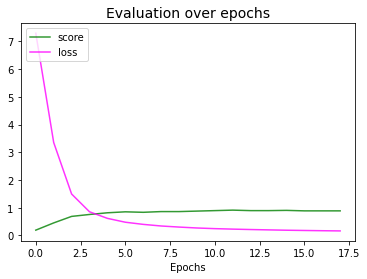

In [96]:
plt.plot(mlp.validation_scores_, color='green', alpha=0.8, label='score')
plt.plot(mlp.loss_curve_, color='magenta', alpha=0.8, label='loss')
plt.title("Evaluation over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

##### c)For training data: accuracy, no. of correct predictions, confusion matrix, precision, recall, f1 score for each class.

In [79]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [81]:
y_pred = mlp.predict(X_train)
y_pred_prob = mlp.predict_proba(X_train)

In [97]:
mat = multilabel_confusion_matrix(y_train, y_pred)
print(mat)

[[[1288    4]
  [   2  143]]

 [[1271   12]
  [  16  138]]

 [[1284    9]
  [  10  134]]

 [[1275   13]
  [  16  133]]

 [[1293    9]
  [  13  122]]

 [[1294    8]
  [   8  127]]

 [[1288    3]
  [   7  139]]

 [[1285    7]
  [   8  137]]

 [[1268   25]
  [  15  129]]

 [[1278   19]
  [  14  126]]]


In [77]:
mlp.score(X_train, y_train)

0.9241475295755045

In [84]:
precision_score(y_train, y_pred, average='micro')

0.9241475295755045

In [89]:
recall_score(y_train, y_pred, average='micro')

0.9241475295755045

In [90]:
f1_score(y_train, y_pred, average='micro')

0.9241475295755045

##### d) For test data: accuracy, no. of correct predictions, confusion matrix, precision, recall, f1 score for each class.

In [80]:
y_pred_test = mlp.predict(X_test)
y_pred_prob_test = mlp.predict_proba(X_test)

In [98]:
mat = multilabel_confusion_matrix(y_test, y_pred_test)
print(mat)

[[[326   1]
  [  2  31]]

 [[328   4]
  [  4  24]]

 [[324   3]
  [  3  30]]

 [[324   2]
  [  1  33]]

 [[312   2]
  [  3  43]]

 [[310   3]
  [  5  42]]

 [[325   0]
  [  1  34]]

 [[324   2]
  [  3  31]]

 [[323   7]
  [  5  25]]

 [[311   9]
  [  6  34]]]


**The right prediction: sum of the value on the diagonal(from left to right)**

In [78]:
mlp.score(X_test, y_test)

0.9083333333333333

In [85]:
precision_score(y_test, y_pred_test, average='micro')

0.9083333333333333

In [91]:
recall_score(y_test, y_pred_test, average='micro')

0.9083333333333333

In [92]:
f1_score(y_test, y_pred_test, average='micro')

0.9083333333333333